# 1. Import

In [1]:
# Import Library

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import f_regression

In [2]:
# Import Data

R10D6 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Diameter%20Bola%20Reflektor/R10%20D6.csv')
R10D7 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Diameter%20Bola%20Reflektor/R10%20D7.csv')
R10D8 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Diameter%20Bola%20Reflektor/R10%20D8.csv')
R10D9 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Diameter%20Bola%20Reflektor/R10%20D9.csv')
R10D10 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Diameter%20Bola%20Reflektor/R10%20D10.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2. Data Understanding

In [3]:
# Read DataFrame
R10D7

,Datetime,Datetime2,Intensity,UV Index,Voltage
0,18:56:37.73,25/7/22 19:0:58,0.04,0,0.03
1,18:56:36.66,25/7/22 19:0:57,0.05,0,0.03
2,18:56:35.60,25/7/22 19:0:56,0.04,0,0.02
3,18:56:34.54,25/7/22 19:0:55,0.04,0,0.02
4,18:56:33.46,25/7/22 19:0:54,0.04,0,0.03
...,...,...,...,...,...
4723,17:33:03.75,25/7/22 17:37:24,0.04,0,0.02
4724,17:33:02.67,25/7/22 17:37:23,0.04,0,0.03
4725,17:33:01.62,25/7/22 17:37:22,0.04,0,0.02
4726,17:33:00.57,25/7/22 17:37:21,0.04,0,0.02


In [4]:
# Get Info about DataFrame
R10D6.info()
R10D7.info()
R10D8.info()
R10D9.info()
R10D10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   4345 non-null   object 
 1   Datetime2  4345 non-null   object 
 2   Intensity  4345 non-null   float64
 3   UV Index   4345 non-null   int64  
 4   Voltage    4345 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 169.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   4728 non-null   object 
 1   Datetime2  4728 non-null   object 
 2   Intensity  4728 non-null   float64
 3   UV Index   4728 non-null   int64  
 4   Voltage    4728 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 184.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 5 colu

In [5]:
# Descriptive Statistics about data
R10D10.describe()

,Intensity,UV Index,Voltage
count,5024.000000,5024.0,5024.000000
mean,0.169962,0.0,0.112375
std,0.007550,0.0,0.004768
min,0.150000,0.0,0.100000
25%,0.170000,0.0,0.110000
50%,0.170000,0.0,0.110000
75%,0.180000,0.0,0.120000
max,0.190000,0.0,0.130000


In [6]:
# Drop Missing Values & Change data type to datetime

R10D6 = R10D6.dropna().iloc[::-1].reset_index()
R10D7 = R10D7.dropna().iloc[::-1].reset_index()
R10D8 = R10D8.dropna().iloc[::-1].reset_index()
R10D9 = R10D9.dropna().iloc[::-1].reset_index()
R10D10 = R10D10.dropna().iloc[::-1].reset_index()
R10D6['Datetime'] = pd.to_datetime(R10D6['Datetime2'], dayfirst=True)
R10D7['Datetime'] = pd.to_datetime(R10D7['Datetime2'], dayfirst=True)
R10D8['Datetime'] = pd.to_datetime(R10D8['Datetime2'], dayfirst=True)
R10D9['Datetime'] = pd.to_datetime(R10D9['Datetime2'], dayfirst=True)
R10D10['Datetime'] = pd.to_datetime(R10D10['Datetime2'], dayfirst=True)
R10D10

,index,Datetime,Datetime2,Intensity,UV Index,Voltage
0,5023,2022-07-25 10:19:11,25/7/22 10:19:11,0.15,0.0,0.10
1,5022,2022-07-25 10:19:12,25/7/22 10:19:12,0.16,0.0,0.11
2,5021,2022-07-25 10:19:13,25/7/22 10:19:13,0.16,0.0,0.11
3,5020,2022-07-25 10:19:14,25/7/22 10:19:14,0.16,0.0,0.11
4,5019,2022-07-25 10:19:15,25/7/22 10:19:15,0.17,0.0,0.11
...,...,...,...,...,...,...
5019,4,2022-07-25 11:47:54,25/7/22 11:47:54,0.17,0.0,0.11
5020,3,2022-07-25 11:47:55,25/7/22 11:47:55,0.18,0.0,0.12
5021,2,2022-07-25 11:47:56,25/7/22 11:47:56,0.18,0.0,0.12
5022,1,2022-07-25 11:47:57,25/7/22 11:47:57,0.17,0.0,0.11


In [7]:
# Get Info about DataFrame
R10D6.info()
R10D7.info()
R10D8.info()
R10D9.info()
R10D10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      4345 non-null   int64         
 1   Datetime   4345 non-null   datetime64[ns]
 2   Datetime2  4345 non-null   object        
 3   Intensity  4345 non-null   float64       
 4   UV Index   4345 non-null   int64         
 5   Voltage    4345 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 203.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      4728 non-null   int64         
 1   Datetime   4728 non-null   datetime64[ns]
 2   Datetime2  4728 non-null   object        
 3   Intensity  4728 non-null   float64       
 4   UV Index   4728 non-null   int64         


In [8]:
# Create Function to Visualise Histogram & Boxplot
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, dpi=216, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = data, x = column, ax = ax_box)
    sns.histplot(data = data, x = column, ax = ax_hist)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

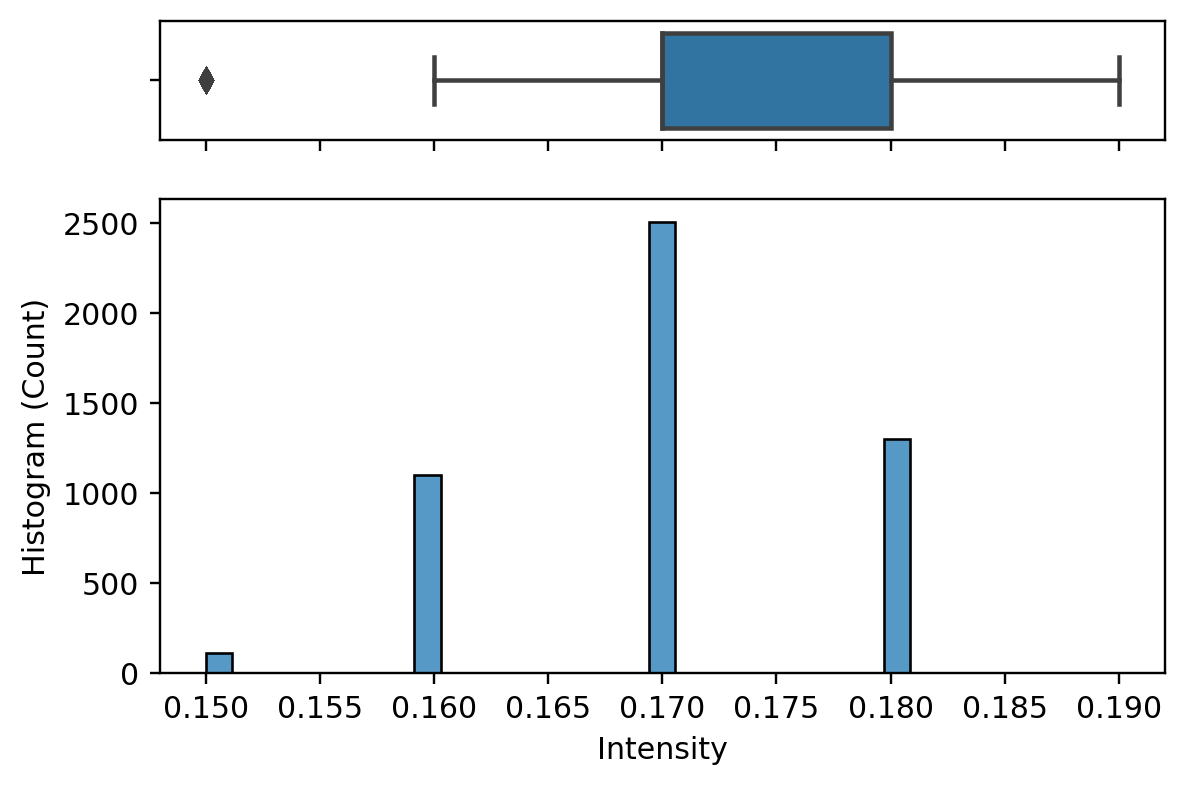

In [9]:
vis_univar(R10D10, 'Intensity')

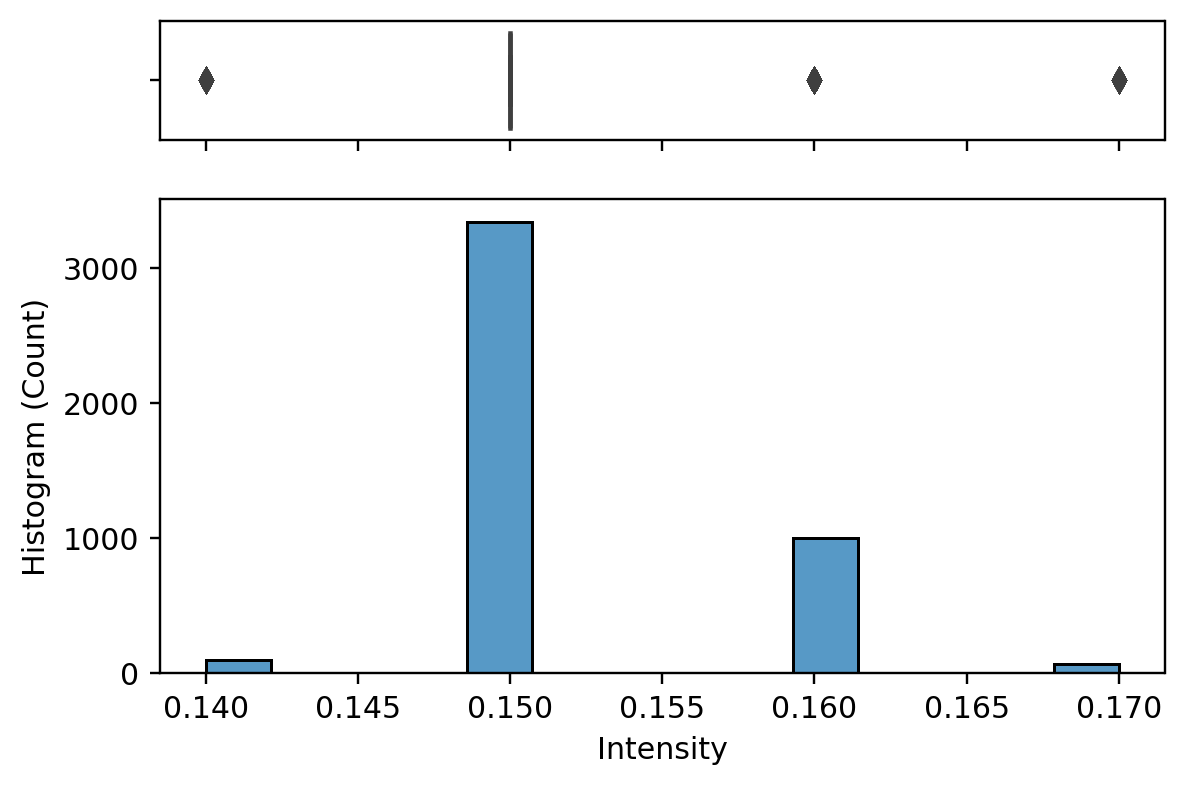

In [10]:
vis_univar(R10D9, 'Intensity')

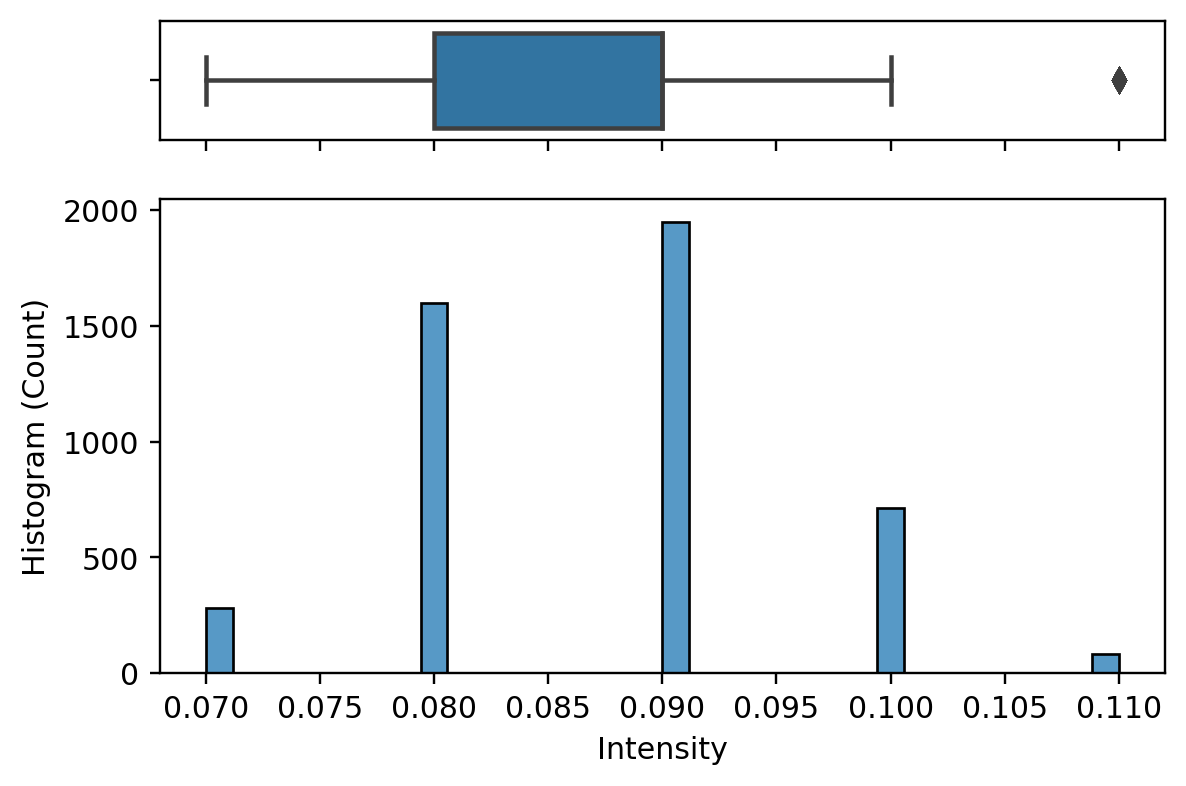

In [11]:
vis_univar(R10D8, 'Intensity')

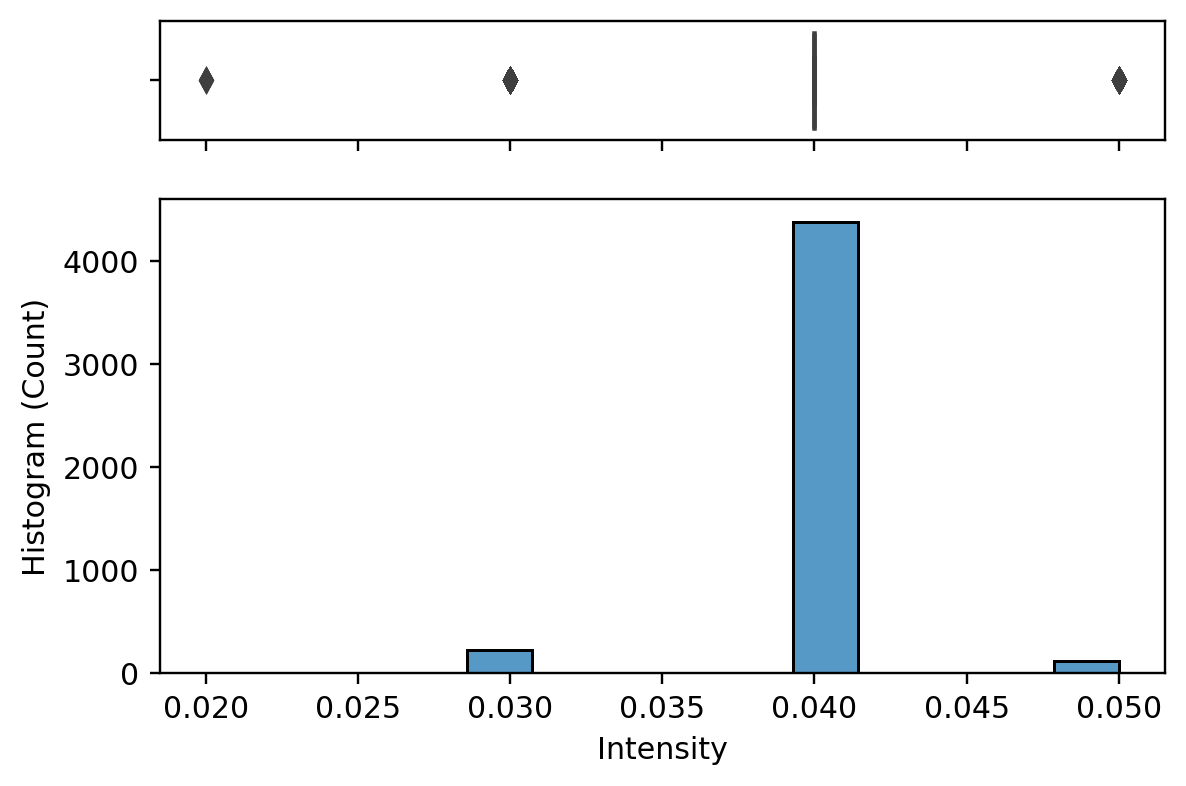

In [12]:
vis_univar(R10D7, 'Intensity')

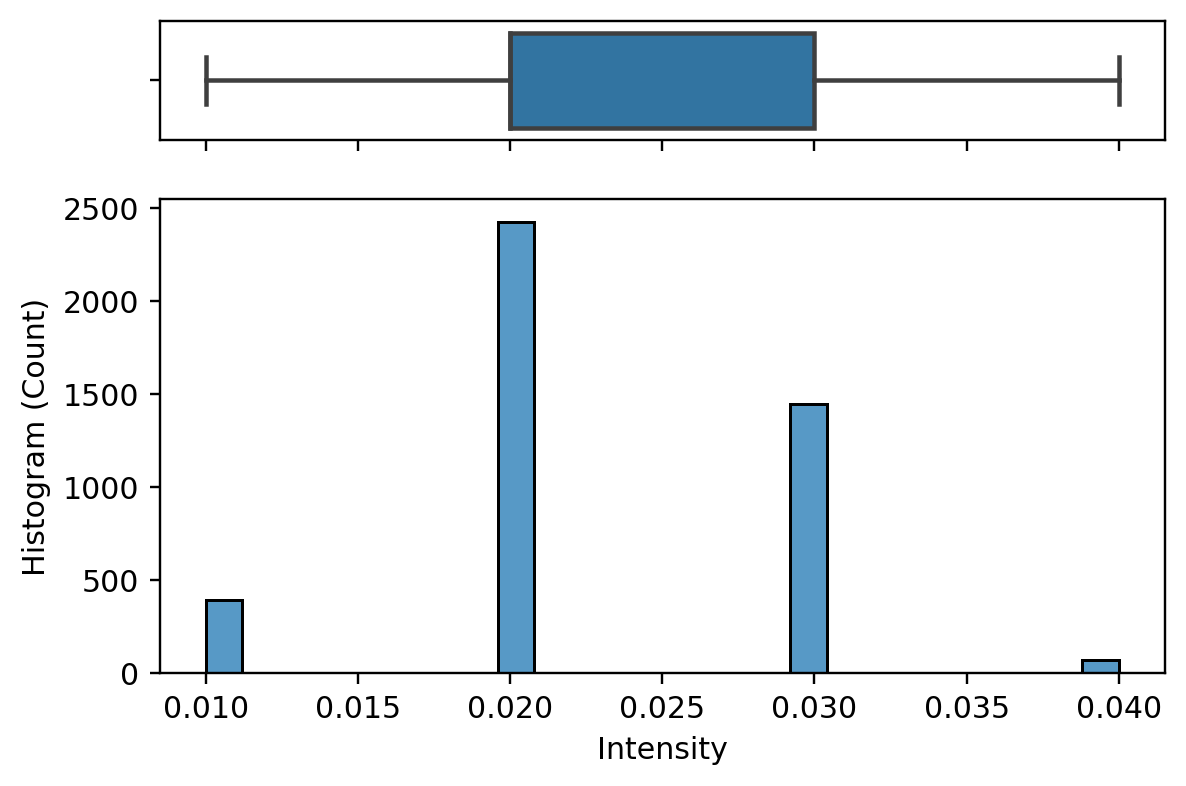

In [13]:
vis_univar(R10D6, 'Intensity')

# 3. Data Manipulation

In [14]:
# Create Function to Get mean every session
def reratasesi(data):
  intensity = []  
  for i in range(7):
    a = i*600
    b = 600*i+599
    intensity.append(data.loc[a:b,'Intensity'].mean())
  return intensity

In [15]:
d6 = reratasesi(R10D6)
d7 = reratasesi(R10D7)
d8 = reratasesi(R10D8)
d9 = reratasesi(R10D9)
d10 = reratasesi(R10D10)

In [16]:
# Get Area
a = np.pi*(6**2)
b = np.pi*(7**2)
c = np.pi*(8**2)
d = np.pi*(9**2)
e = np.pi*(10**2)

print(a,b,c,d,e)

113.09733552923255 153.93804002589985 201.06192982974676 254.46900494077323 314.1592653589793


In [17]:
df = pd.DataFrame({'Sesi' : [i+1 for i in range(7)],
                    '113.097' : d6,
                   '153.938' : d7,
                   '201.062' : d8,
                   '254.469' : d9,
                   '314.159' : d10})
df

,Sesi,113.097,153.938,201.062,254.469,314.159
0,1,0.023167,0.039717,0.097200,0.150517,0.167467
1,2,0.022550,0.039683,0.096200,0.151217,0.169233
2,3,0.023083,0.039433,0.090967,0.151550,0.168150
3,4,0.022167,0.039967,0.086067,0.151767,0.167733
4,5,0.022217,0.039650,0.083750,0.151750,0.168433
5,6,0.022417,0.039583,0.081800,0.153183,0.171850
6,7,0.023633,0.039933,0.080517,0.154983,0.172700


In [18]:
df3 = pd.DataFrame({'Sesi' : [i+1 for i in range(7)],
                    '6 cm' : d6,
                   '7 cm' : d7,
                   '8 cm' : d8,
                   '9 cm' : d9,
                   '10 cm' : d10})
#df3.to_excel('/content/drive/MyDrive/TA Skripsi/Code/Data Penelitian Skripsi/Variasi Diameter Bola Reflektor/Mean D.xlsx')
df3

,Sesi,6 cm,7 cm,8 cm,9 cm,10 cm
0,1,0.023167,0.039717,0.097200,0.150517,0.167467
1,2,0.022550,0.039683,0.096200,0.151217,0.169233
2,3,0.023083,0.039433,0.090967,0.151550,0.168150
3,4,0.022167,0.039967,0.086067,0.151767,0.167733
4,5,0.022217,0.039650,0.083750,0.151750,0.168433
5,6,0.022417,0.039583,0.081800,0.153183,0.171850
6,7,0.023633,0.039933,0.080517,0.154983,0.172700


In [19]:
# Create Function to Get Standard Deviation every session
def stdsesi(data):
  intensity = []  
  for i in range(7):
    a = i*600
    b = 600*i+599
    intensity.append(data.loc[a:b,'Intensity'].std())
  return intensity

d6 = stdsesi(R10D6)
d7 = stdsesi(R10D7)
d8 = stdsesi(R10D8)
d9 = stdsesi(R10D9)
d10 = stdsesi(R10D10)

In [20]:
df4 = pd.DataFrame({'Sesi' : [i+1 for i in range(7)],
                    '6 cm' : d6,
                   '7 cm' : d7,
                   '8 cm' : d8,
                   '9 cm' : d9,
                   '10 cm' : d10})
#df4.to_excel('/content/drive/MyDrive/TA Skripsi/Code/Data Penelitian Skripsi/Variasi Diameter Bola Reflektor/Std D.xlsx')
df4

,Sesi,6 cm,7 cm,8 cm,9 cm,10 cm
0,1,0.006484,0.002536,0.006046,0.004427,0.008043
1,2,0.006434,0.002532,0.005912,0.004288,0.007539
2,3,0.006688,0.002713,0.004012,0.004487,0.007736
3,4,0.006561,0.002451,0.004923,0.004310,0.007391
4,5,0.006244,0.003119,0.005430,0.004488,0.007392
5,6,0.006486,0.002770,0.005611,0.005074,0.006891
6,7,0.006314,0.002382,0.006295,0.005921,0.006489


In [21]:
df2 = pd.melt(df, id_vars =['Sesi'], value_vars =['113.097','153.938','201.062','254.469','314.159'],
              var_name ='Luas', value_name ='Rerata Intensitas')
df2['Luas'] = df2['Luas'].astype(float)
df2

,Sesi,Luas,Rerata Intensitas
0,1,113.097,0.023167
1,2,113.097,0.022550
2,3,113.097,0.023083
3,4,113.097,0.022167
4,5,113.097,0.022217
5,6,113.097,0.022417
6,7,113.097,0.023633
7,1,153.938,0.039717
8,2,153.938,0.039683
9,3,153.938,0.039433


# 4. Modelling & Data Visualization

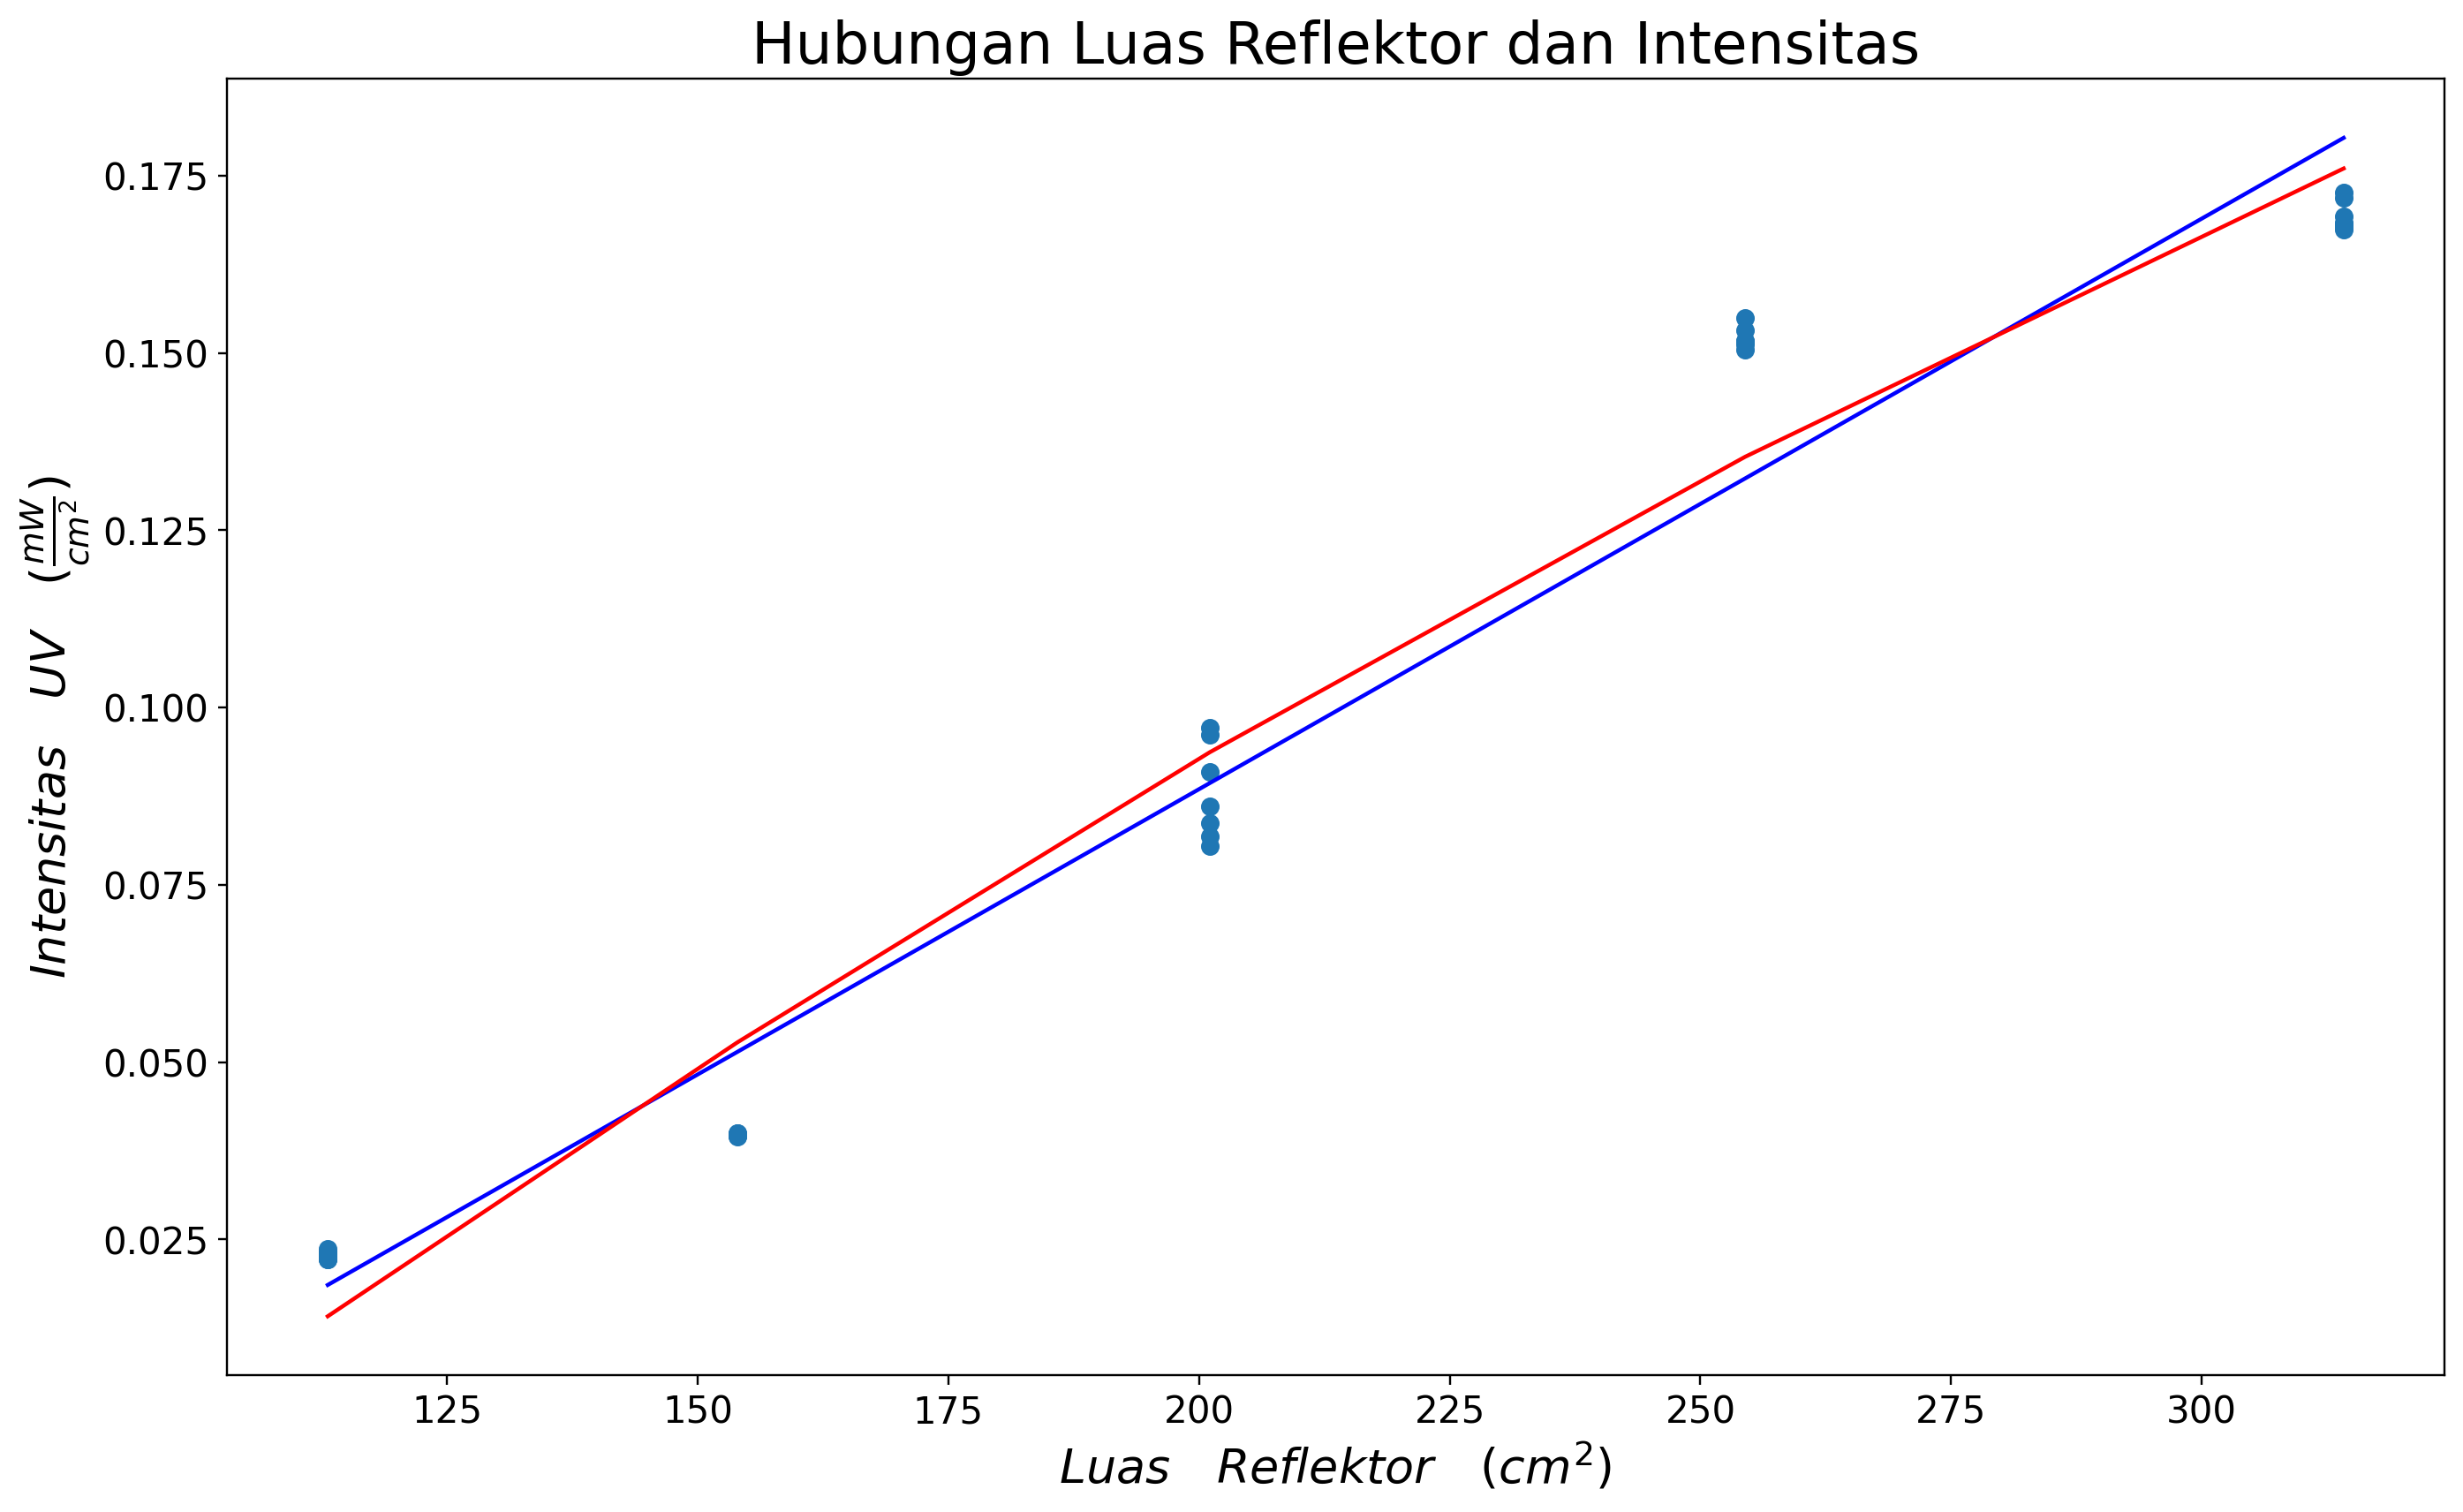

In [22]:
# Create Linear & Polynomial Regression & Visualize it

x = df2['Luas'].array
y = df2['Rerata Intensitas'].array

linear = np.polyfit(x, y, 1)
predict = np.poly1d(linear)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

plt.figure(figsize=(15, 9), dpi=216)
plt.title("Hubungan Luas Reflektor dan Intensitas", fontsize=22)
plt.xlabel(r'$ Luas \quad Reflektor \quad (cm^2)$', fontsize='18')
plt.ylabel(r'$ Intensitas \quad UV \quad (\frac{mW}{cm^2})$', fontsize='18')
plt.xticks(fontsize='14')
plt.yticks(fontsize='14')
plt.scatter(x, y)
plt.plot(x, predict(x), c = 'b')
plt.plot(x, y_predicted, c="red")
plt.show()

# 5. Evaluation Metrics

In [23]:
# Get Metrics for Regression Models

fscores_linear, pvalues_linear = f_regression(y.reshape(-1, 1), y_predicted.reshape(-1, 1))
fscores_poly, pvalues_poly = f_regression(y.reshape(-1, 1), predict(x).reshape(-1, 1))

print('Hasil Linear Model'.center(100))
print('-'*100)
print('Koefisien dan Konstanta Linear Model = {} dan {}'.format(linear[0],linear[1]))
print('r2 =', (r2_score(y, y_predicted)))
print('F-score:', fscores_linear[0])
print('p-values: {}'.format(pvalues_linear[0]))
#print('MSE_linearmodel =', np.sqrt(mean_squared_error(y, y_predicted)))
print('MAPE =', mean_absolute_percentage_error(y, y_predicted)*100, '%')
print('')
print('Hasil Polynomial Model (Degree: 2)'.center(100))
print('-'*100)
print('Koefisien dan Konstanta Polynomial Model =', poly_reg_model.coef_, 'dan', poly_reg_model.intercept_)
print('r2 =', (r2_score(y, predict(x))))
print('F-score:', fscores_poly[0])
print('p-values: {}'.format(pvalues_poly[0]))
#print('MSE_polymodel =', np.sqrt(mean_squared_error(y, predict(x))))
print('MAPE =', mean_absolute_percentage_error(y, predict(x))*100, '%')

                                         Hasil Linear Model                                         
----------------------------------------------------------------------------------------------------
Koefisien dan Konstanta Linear Model = 0.00080466663147555 dan -0.07243693603663123
r2 = 0.9622994607815492
F-score: 842.3190454063545
p-values: 4.539293543973067e-25
MAPE = 18.863061648305177 %

                                 Hasil Polynomial Model (Degree: 2)                                 
----------------------------------------------------------------------------------------------------
Koefisien dan Konstanta Polynomial Model = [ 1.17973832e-03 -8.76704701e-07] dan -0.10806050437811084
r2 = 0.9583281666625585
F-score: 758.9018040981902
p-values: 2.3741129389266147e-24
MAPE = 14.83647201104216 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Get Pearson Correlation & P-values

print('Korelasi Pearson untuk Variabel Diameter'.center(41))
print('Luas Reflektor dan Iradiasi'.center(41))
print(('-'*41))
print('Korelasi Pearson: {}'.format(df2['Luas'].corr(df2['Rerata Intensitas'], 'pearson')))
scores, pvalues = f_regression(df2.iloc[:, 1].values.reshape(-1, 1), df2.iloc[:, -1].values.reshape(-1, 1))
print('p-values: {}'.format(pvalues[0]))
print('N: {}'.format(df2.shape[0]))

 Korelasi Pearson untuk Variabel Diameter
       Luas Reflektor dan Iradiasi       
-----------------------------------------
Korelasi Pearson: 0.9789423714716604
p-values: 2.3741129389276664e-24
N: 35


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
